In [92]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 2000)
pd.set_option("display.max_rows", 2000)
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["patch.force_edgecolor"] = True
plt.rcParams["figure.figsize"] = (20.0, 10.0)
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Exploratory Data Analysis

## Objectives:
* Understand motives for EDA
* Know basic EDA questions
* Applying Python skills to get started with EDA

# Key EDA Questions

* What are the feature names and types?
* Are values missing?
* Which features are continuous and which are categorical?
* What is the distribution of the features?
* What is the distribution of the target?
* How do the features relate to the target?
* How do the variables relate to each other?

In [6]:
cars = pd.read_csv('data/cars_multivariate.csv')
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [7]:
# can read directly from a website!

cars = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Auto.csv',sep= ',')
cars.sample(10) # sample vs head

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
349,34.1,4,91.0,68,1985,16.0,81,3,mazda glc 4
211,16.5,6,168.0,120,3820,16.7,76,2,mercedes-benz 280s
195,29.0,4,85.0,52,2035,22.2,76,1,chevrolet chevette
149,24.0,4,120.0,97,2489,15.0,74,3,honda civic
63,14.0,8,400.0,175,4385,12.0,72,1,pontiac catalina
72,15.0,8,304.0,150,3892,12.5,72,1,amc matador (sw)
261,18.1,6,258.0,120,3410,15.1,78,1,amc concord d/l
381,34.0,4,108.0,70,2245,16.9,82,3,toyota corolla
44,13.0,8,400.0,175,5140,12.0,71,1,pontiac safari (sw)
380,36.0,4,107.0,75,2205,14.5,82,3,honda accord


## Start with a very high level overview
- What do the first few rows look like?
- What are the different columns?
- Different data types
- Data summaries

In [8]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [9]:
cars.shape

(397, 9)

In [10]:
cars.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


## Are there any values missing?

In [11]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


Do the variable types make sense? Notice that HP has variable type 'object' - this doesn't seem right.

What good are the columns if you don't know what they mean?

How can we make conclusions about reasonable values and check our data?

In [12]:
cars['horsepower'].tail()

392    86
393    52
394    84
395    79
396    82
Name: horsepower, dtype: object

All the values that we can see look like numbers. Why is horsepower an object then???

In [13]:
# Force convert horsepower to numeric
pd.to_numeric(cars['horsepower'])

ValueError: Unable to parse string "?" at position 32

In [14]:
cars['horsepower'][32]

'?'

In [89]:
# Forcibly convert this column to numeric

# pd.to_numeric(cars['horsepower'],errors='coerce')

In [19]:
# boolean indexing

pd.to_numeric(cars['horsepower'],errors='coerce').isnull().sum()

5

In [20]:
cars[pd.to_numeric(cars['horsepower'],errors='coerce').isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


In [21]:
cars.loc[pd.to_numeric(cars['horsepower'],errors='coerce').isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


errors : {‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’
If ‘raise’, then invalid parsing will raise an exception
If ‘coerce’, then invalid parsing will be set as NaN
If ‘ignore’, then invalid parsing will return the input

In [22]:
cars['horsepower'] = pd.to_numeric(cars['horsepower'],errors='coerce')

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      392 non-null float64
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


In [23]:
#reload the data but tell it what the na values will look like

cars = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Auto.csv',sep= ',',na_values='?')
cars[cars['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i


In [24]:
# Let's just drop those rows
# notice the switch from isnull() to notnull()
cars = cars[pd.to_numeric(cars['horsepower'],errors='coerce').notnull()]
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


## What would be a fancier way of dealing with those null HP values?

Imputing: mean? median? mode? something else?  
How will you indicate that these values were imputed?

In [31]:
cars.describe()['horsepower']

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

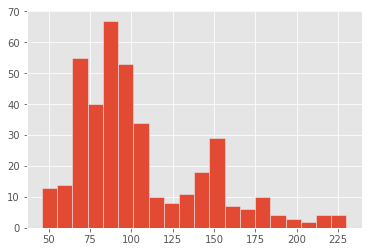

In [32]:
plt.hist(cars['horsepower'], bins=20)
plt.show()

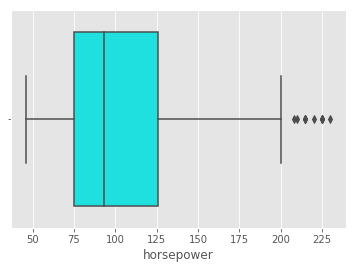

In [33]:
sns.boxplot(cars['horsepower'], color='Aqua')

In [34]:
print(cars['horsepower'].mean())
print(cars['horsepower'].median())

104.46938775510205
93.5


In [43]:
med = cars['horsepower'].median()
cars['hp_imputed'] = cars['horsepower'].isnull()
cars['horsepower'].fillna(value=med, inplace=True)
cars.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
hp_imputed      0
dtype: int64

### How about using a model?

In [44]:
cars = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Auto.csv',sep= ',',na_values='?')
hp_missing = cars[cars['horsepower'].isnull()]
hp_exists = cars[cars['horsepower'].notnull()]

In [45]:
print(hp_missing.shape)
print(hp_exists.shape)

(5, 9)
(392, 9)


In [46]:
hp_model = LinearRegression()
X = hp_exists[['mpg', 'cylinders', 'displacement', 'weight', 'acceleration']]
y = hp_exists['horsepower']
hp_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
hp_model.predict(hp_missing[['mpg', 'cylinders', 'displacement', 'weight', 'acceleration']])

array([ 60.88217898,  96.12772311,  56.61396223, 105.19087152,
        77.30693185])

## But now we are getting off track...

In [48]:
# What about origin? model?
cars['origin'].value_counts()

1    248
3     79
2     70
Name: origin, dtype: int64

In [49]:
cars['year'].value_counts()

73    40
78    36
76    34
82    30
75    30
81    29
80    29
79    29
70    29
77    28
72    28
71    28
74    27
Name: year, dtype: int64

In [50]:
# Change type to prevent Origin and Year from being treated as numeric features

cars['origin'] = cars['origin'].astype(str)
cars['year'] = cars['year'].astype(str)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      392 non-null float64
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null object
origin          397 non-null object
name            397 non-null object
dtypes: float64(4), int64(2), object(3)
memory usage: 28.0+ KB


In [51]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [52]:
# Back to just dropping rows with null values

cars.dropna(axis=0, how='any', inplace=True)

In [53]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null object
origin          392 non-null object
name            392 non-null object
dtypes: float64(4), int64(2), object(3)
memory usage: 30.6+ KB


### Our data set has 5-6 numeric variables and 3-4 categorical variables (cylinders is kind of a wild card). Sometimes it is good to keep track of these:

In [54]:
num_vars = ['mpg','cylinders','displacement','horsepower','weight','acceleration']
cat_vars = ['year', 'origin', 'name']

## Visual Exploration

http://www.colors.commutercreative.com/grid/

### Univariate-Numeric Viz

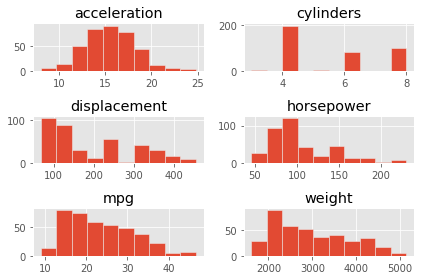

In [55]:
# Histograms
# Fast!

ax = cars[num_vars].hist()
plt.tight_layout()

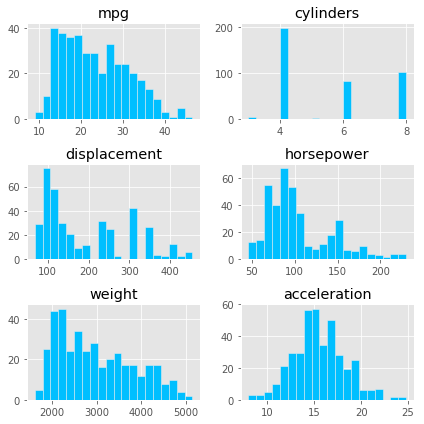

In [57]:
# Pretty!

fig, axes = plt.subplots(3,2, figsize=(6,6))
for ax, var in zip(axes.ravel(), num_vars):
        ax.hist(cars[var], bins=20, color='DeepSkyBlue')
        ax.set_title(var)
plt.tight_layout()

In [58]:
from bokeh_histogram import BokehHistogram

In [61]:
bh = BokehHistogram()
bh.histotabs(cars, num_vars)

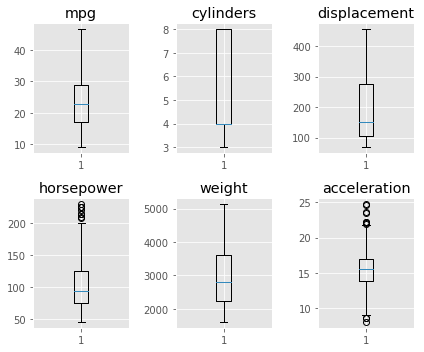

In [64]:
# Boxplots
fig, axes = plt.subplots(2,3, figsize=(6,5))
for ax, var in zip(axes.ravel(), num_vars):
    ax.boxplot(cars[var])
    ax.set_title(var)
plt.tight_layout()

In [65]:
axes.ravel().shape

(6,)

In [66]:
axes.shape

(2, 3)

In [67]:
import seaborn as sns

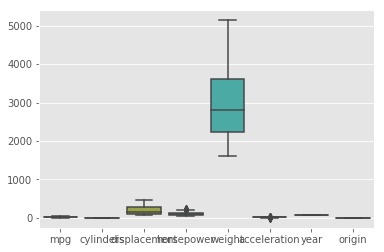

In [68]:
sns.boxplot(data=cars)

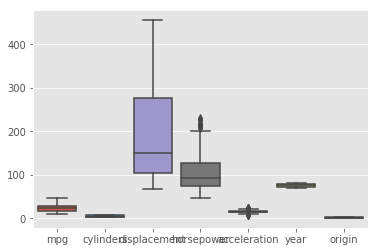

In [69]:
sns.boxplot(data=cars.drop('weight', axis=1))
# plt.xticks(rotation=60)

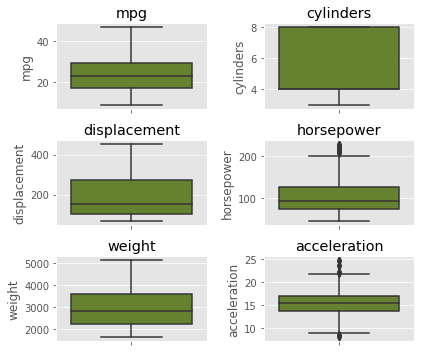

In [71]:
# Boxplots
fig, axes = plt.subplots(3,2, figsize=(6,5))
for ax, var in zip(axes.ravel(), num_vars):
    sns.boxplot(y=var,data=cars,ax=ax, color='OliveDrab')
    ax.set_title(var)
plt.tight_layout()

In [72]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


### Univariate - Categorical

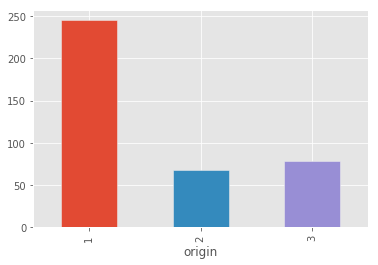

In [73]:
# Categorical
origin_count = cars.groupby('origin').apply(len)
origin_count.plot(kind='bar')

In [74]:
origin_count

origin
1    245
2     68
3     79
dtype: int64

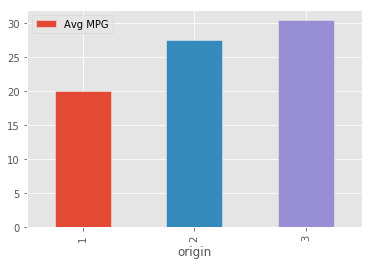

In [75]:
# Categorical vs Numeric
agg = cars.groupby('origin')['mpg'].mean()
agg.plot(kind='bar', label="Avg MPG", legend=True)

origin  cylinders
1       4            28.013043
        6            19.645205
        8            14.963107
2       4            28.106557
        5            27.366667
        6            20.100000
3       3            20.550000
        4            31.595652
        6            23.883333
Name: mpg, dtype: float64
cylinders      3          4          5          6          8
origin                                                      
1            NaN  28.013043        NaN  19.645205  14.963107
2            NaN  28.106557  27.366667  20.100000        NaN
3          20.55  31.595652        NaN  23.883333        NaN


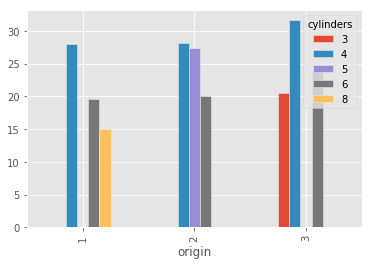

In [76]:
# Categorical vs categorical vs numeric
agg = cars.groupby(['origin','cylinders'])['mpg'].mean()
print(agg)
agg = agg.unstack(level='cylinders')
print(agg)
agg.plot(kind='bar', legend=True, label="Avg MPG")

In [78]:
# bh.filtered_histotabs(cars, 'mpg', 'year')

### Numeric vs Numeric

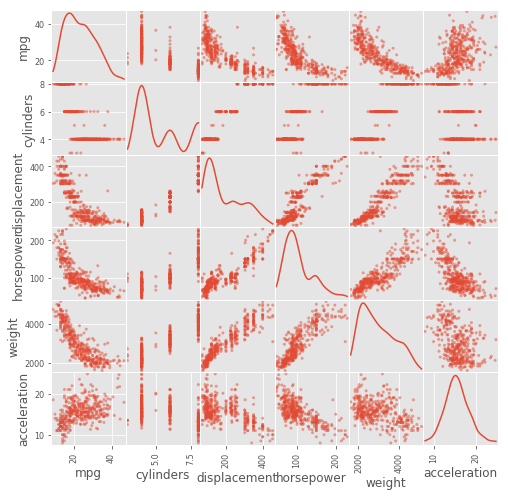

In [79]:
# Scatterplot matrix
from pandas.plotting import scatter_matrix
ax = scatter_matrix(cars[num_vars],figsize=(8,8),diagonal = 'kde')


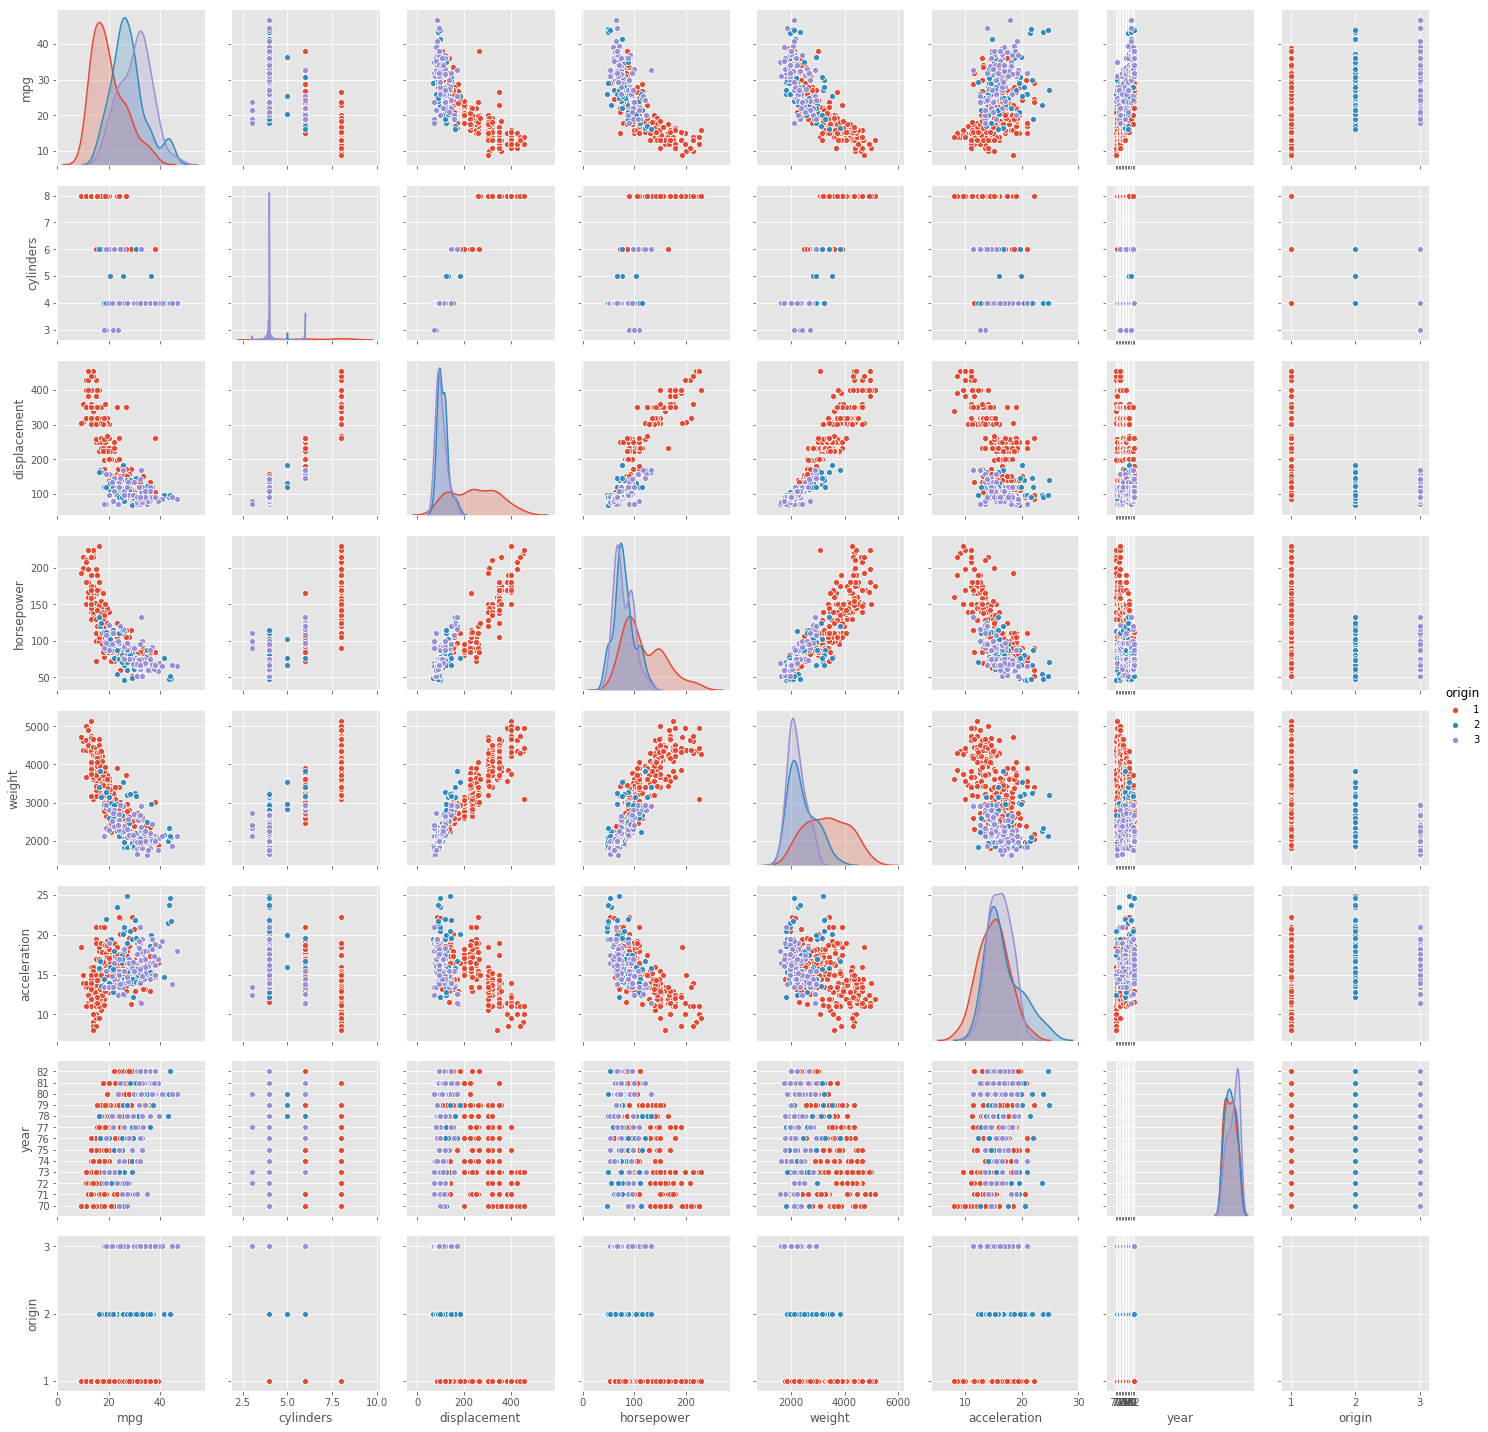

In [96]:
sns.pairplot(data=cars, hue='origin')

Text(0, 0.5, 'AVG MPG')

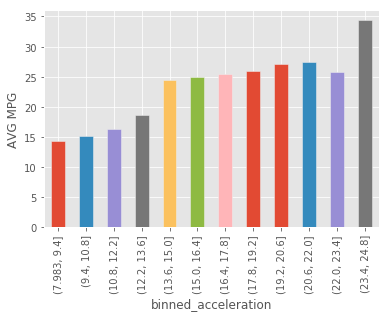

In [97]:
# Use binning to see relationships more clearly
cars['binned_acceleration'] = pd.cut(cars.acceleration, bins=12)
agg = cars.groupby('binned_acceleration')['mpg'].mean()
agg.plot(kind='bar')
plt.ylabel('AVG MPG')

In [98]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,binned_acceleration
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,"(10.8, 12.2]"
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,"(10.8, 12.2]"
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,"(10.8, 12.2]"
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,"(10.8, 12.2]"
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,"(9.4, 10.8]"


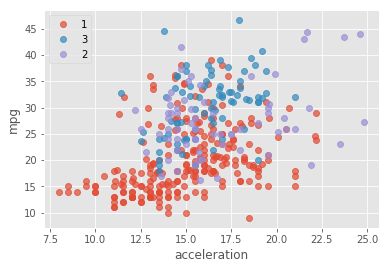

In [101]:
# Scatter plot by category
origins = cars['origin'].unique()
for origin in origins:
    plt.plot(cars.loc[cars.origin==origin,'acceleration'], 
             cars.loc[cars.origin==origin,'mpg'], 
             linestyle='',
             marker='o',
             alpha=.7,
             label=origin)
plt.xlabel('acceleration')
plt.ylabel('mpg')
plt.legend()
    

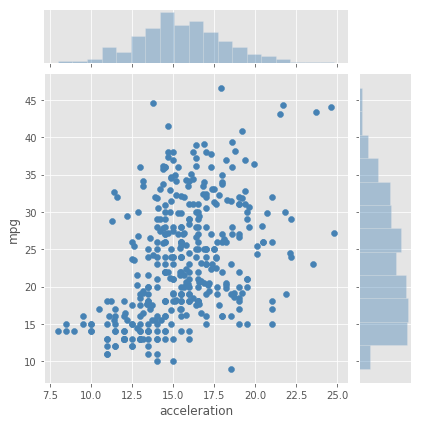

In [102]:
sns.jointplot(x='acceleration', y='mpg', data=cars, color='SteelBlue')

In [103]:
# Categorical vs Categorical
pd.crosstab(cars['origin'], cars['year'])


year,70,71,72,73,74,75,76,77,78,79,80,81,82
origin,,,,,,,,,,,,,
1,22,19,18,29,14,20,22,18,22,23,6,13,19
2,5,4,5,7,6,6,8,4,6,4,8,3,2
3,2,4,5,4,6,4,4,6,8,2,13,12,9


Aha! Model means model year --- we probably should have left this as numeric

Text(0.5, 1.0, 'MPG by origin and model year')

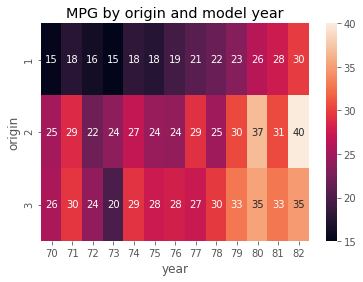

In [104]:
# Heat-map

agg = cars.groupby(['origin','year'])['mpg'].mean()
ax = sns.heatmap(agg.unstack(level='year'), annot=True)
ax.set_title('MPG by origin and model year')

In [105]:
cars.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000


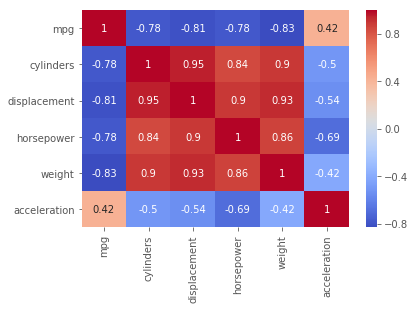

In [107]:
sns.heatmap(cars.corr(), annot=True, cmap='coolwarm')